# Data Preprocessing Workflow

This notebook demonstrates a comprehensive data preprocessing workflow for LC/MS-MS phosphoproteomics experiment data. The steps include renaming samples based on metadata, filtering for canonical phosphorylations, merging duplicate entries, applying a log2 transformation, and excluding low-quality samples and phosphosites.

## Workflow Overview:
1. **Rename Samples:** Align sample names with metadata.
2. **Filter Canonical Phosphosites:** Retain rows with canonical phosphorylations (S, T, Y).
3. **Merge Duplicates:** Combine duplicate entries by averaging.
4. **Log2 Transformation and Cleaning:** Apply log2 transformation and handle NaN values.
5. **Quality Control - Exclude Low-Quality Samples:** Remove samples that do not meet predefined quality standards.
6. **Quality Control - Exclude Low-Quality Phosphosites:** Remove phosphosites with a high proportion of NA values. 

Let's start by importing necessary libraries and loading our dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import os
import logging

# Import functions from the data_wrangling module
import src.data_wrangling as dw

# Configure logging
logging.basicConfig(level=logging.INFO)

# Set working directory
os.chdir('../')

## Loading Phosphoproteomics Data

We start by loading our dataset containing Area Under the Peak (AUP) data from LC-MS/MS phosphoproteomics experiments. Rows represent phosphosites (or features), and columns represent samples.

In [2]:
# Load the dataset
aup = pd.read_csv('workspace/id_mapped_data.tsv', sep='\t', index_col=0)

# Display the first few rows of the dataset
aup.head()

,b1790p079_PP1_MCF7_AZD1480_r1,b1790p079_PP1_MCF7_AZD1480_r2,b1790p079_PP1_MCF7_AZD5363_r1,b1790p079_PP1_MCF7_AZD5363_r2,b1790p079_PP1_MCF7_BX_r1,b1790p079_PP1_MCF7_BX_r2,b1790p079_PP1_MCF7_CHIR_r1,b1790p079_PP1_MCF7_CHIR_r2,b1790p079_PP1_MCF7_DMSO_r1,b1790p079_PP1_MCF7_DMSO_r2,...,b1790p077_PP2_MCF7_KU_r1,b1790p077_PP2_MCF7_KU_r2,b1790p077_PP2_MCF7_PD_r1,b1790p077_PP2_MCF7_PD_r2,b1790p077_PP2_MCF7_PF_r1,b1790p077_PP2_MCF7_PF_r2,b1790p077_PP2_MCF7_TORIN_r1,b1790p077_PP2_MCF7_TORIN_r2,b1790p077_PP2_MCF7_TRAMETINIB_r1,b1790p077_PP2_MCF7_TRAMETINIB_r2
AAAS(S495),2.664712e+09,3.635279e+09,3.285959e+09,2.743536e+09,3.822861e+09,4.393195e+09,3.287022e+09,3.540691e+09,2.247902e+09,6.012226e+09,...,8.963979e+09,8.351130e+09,9.330759e+09,7.767012e+09,7.900387e+09,7.211204e+09,8.041161e+09,8.921806e+09,8.499730e+09,7.352127e+09
AAGAB(M297),0.000000e+00,0.000000e+00,6.526145e+07,0.000000e+00,0.000000e+00,0.000000e+00,5.477754e+06,4.922887e+06,0.000000e+00,0.000000e+00,...,2.654259e+07,5.902313e+07,7.761711e+07,3.916353e+07,4.230814e+07,2.161106e+07,0.000000e+00,3.161788e+07,1.732876e+08,2.219852e+08
AAGAB(S310),1.219400e+09,1.578639e+09,1.083647e+09,9.467747e+08,1.850897e+08,3.065556e+08,1.231307e+08,6.337119e+07,2.275421e+08,8.498069e+07,...,7.082795e+08,8.271310e+08,5.338869e+08,3.855521e+08,9.326324e+08,6.311395e+08,6.821255e+08,5.115066e+08,9.902843e+08,7.665052e+08
AAGAB(S311),1.219400e+09,1.578639e+09,1.083647e+09,9.467747e+08,1.850897e+08,3.065556e+08,1.231307e+08,6.337119e+07,2.275421e+08,8.498069e+07,...,1.593237e+09,1.712089e+09,1.237525e+09,1.012566e+09,1.602475e+09,1.309217e+09,1.377144e+09,1.177742e+09,1.742970e+09,1.431783e+09
AAK1(S14),8.624913e+08,1.414261e+09,1.916668e+09,1.086577e+09,8.751045e+08,1.559491e+08,9.583288e+08,8.503202e+08,1.115720e+09,1.117170e+09,...,1.392150e+09,6.465040e+08,1.100319e+09,6.495936e+08,1.397288e+09,1.449160e+09,1.454729e+09,1.980154e+09,8.421942e+08,1.566950e+09


In [3]:
# Load the metadata
metadata = pd.read_csv('resources/raw_data/metadata.tsv', sep='\t')

# Display the first few rows of the metadata
metadata.head()

,name,perturbagen,cell_line,batch,rep,sampleID,status
0,b1790p087_MCF7_AC220_PP1_r1,AC220,MCF7,b1790p087,1,b1790p087_MCF7_AC220_1,perturbed
1,b1790p087_MCF7_AC220_PP1_r2,AC220,MCF7,b1790p087,2,b1790p087_MCF7_AC220_2,perturbed
2,b1790p087_MCF7_AC220_PP2_r1,AC220,MCF7,b1790p087,3,b1790p087_MCF7_AC220_3,perturbed
3,b1790p087_MCF7_AC220_PP2_r2,AC220,MCF7,b1790p087,4,b1790p087_MCF7_AC220_4,perturbed
4,b1790p086_MCF7_MP-470_PP1_r1,Amuvatinib,MCF7,b1790p086,1,b1790p086_MCF7_Amuvatinib_1,perturbed


## 1. Renaming Samples

To ensure consistency and clarity in our dataset, we align sample names in our data with the corresponding IDs provided in the metadata. The metadata's first column should match the column names in the AUP data, establishing a direct link between samples and their corresponding metadata. 

For added flexibility, an optional 'sampleID' column in the metadata can be utilized to rename samples within the AUP data to more descriptive or standardized names. This step is particularly useful when aiming to harmonize sample naming conventions across multiple datasets or when the original names lack descriptive value.

If the current naming convention suits your analysis needs, ensure the metadata's first column is labeled 'sampleID'. This naming strategy facilitates a straightforward renaming process, should it be required.

In [4]:
# Optionally rename samples in the AUP data based on 'sampleID' column in the metadata.
# This step aligns the sample names in the AUP data with those specified in the metadata, enhancing data consistency and clarity.

# Performing the renaming operation (optional)
aup, metadata = dw.rename_samples_based_on_metadata(aup, metadata)

# Displaying the top rows of the AUP data to confirm the renaming process
aup.head()

name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
AAAS(S495),7.994416e+09,7.171793e+09,5.300724e+09,5.152524e+09,2.756288e+09,2.744142e+09,2.571629e+09,2.693839e+09,5.776712e+09,4.676683e+09,...,3.985275e+09,3.545580e+09,2.875532e+09,3.655696e+09,3.202673e+09,4.473797e+09,5.305366e+09,4.390906e+09,4.503575e+09,4.356866e+09
AAGAB(M297),1.886535e+08,1.895284e+08,4.488463e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.884316e+07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.162294e+08,1.089642e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AAGAB(S310),4.680102e+08,4.430923e+08,5.856524e+08,6.539963e+08,2.528849e+08,2.543955e+08,1.244431e+08,2.278430e+08,4.665312e+07,4.982907e+07,...,0.000000e+00,0.000000e+00,5.162308e+08,5.397537e+08,5.452114e+07,0.000000e+00,0.000000e+00,2.985807e+07,0.000000e+00,5.333668e+07
AAGAB(S311),8.159771e+08,7.627058e+08,8.630201e+08,1.145268e+09,2.528849e+08,2.543955e+08,1.244431e+08,2.278430e+08,7.293124e+07,7.050133e+07,...,0.000000e+00,0.000000e+00,5.162308e+08,5.397537e+08,5.452114e+07,0.000000e+00,4.438691e+07,7.037644e+07,0.000000e+00,8.091985e+07
AAK1(S14),7.997759e+08,1.124918e+09,1.851512e+08,1.736382e+08,1.459799e+08,2.045432e+08,1.738850e+08,1.847389e+08,1.734326e+09,1.230038e+09,...,1.169429e+09,1.138968e+09,1.013473e+09,3.624770e+08,9.925948e+08,1.392941e+09,1.108540e+09,1.191573e+09,9.228934e+08,1.191988e+09


## 2. Filtering Canonical Phosphorylations

In phosphoproteomics data, the phosphorylation sites can include serine (S), threonine (T), and tyrosine (Y), known as canonical phosphorylations. These residues are biologically significant due to their prevalent role in signaling pathways and regulatory mechanisms. To focus our analysis on these pivotal sites, we filter our dataset to retain only phosphosites that occur on serine, threonine, or tyrosine residues.

In [5]:
# Filtering the AUP data to retain only rows with canonical phosphorylations (S, T, Y).
# The 'filter_canonical_psts' function examines the phosphosite IDs (expected to be the DataFrame's index)
# and retains only those that indicate phosphorylation on serine, threonine, or tyrosine.

# Execute the filtering process
aup_f = dw.filter_canonical_psts(aup)

# Display the first few rows of the filtered dataset to verify the focus on canonical phosphorylations
aup_f.head()

INFO:root:Removed 749 non-canonical phosphosite entries. Retained 13699 entries.


name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
AAAS(S495),7.994416e+09,7.171793e+09,5.300724e+09,5.152524e+09,2.756288e+09,2.744142e+09,2.571629e+09,2.693839e+09,5.776712e+09,4.676683e+09,...,3.985275e+09,3.545580e+09,2.875532e+09,3.655696e+09,3.202673e+09,4.473797e+09,5.305366e+09,4.390906e+09,4.503575e+09,4.356866e+09
AAGAB(S310),4.680102e+08,4.430923e+08,5.856524e+08,6.539963e+08,2.528849e+08,2.543955e+08,1.244431e+08,2.278430e+08,4.665312e+07,4.982907e+07,...,0.000000e+00,0.000000e+00,5.162308e+08,5.397537e+08,5.452114e+07,0.000000e+00,0.000000e+00,2.985807e+07,0.000000e+00,5.333668e+07
AAGAB(S311),8.159771e+08,7.627058e+08,8.630201e+08,1.145268e+09,2.528849e+08,2.543955e+08,1.244431e+08,2.278430e+08,7.293124e+07,7.050133e+07,...,0.000000e+00,0.000000e+00,5.162308e+08,5.397537e+08,5.452114e+07,0.000000e+00,4.438691e+07,7.037644e+07,0.000000e+00,8.091985e+07
AAK1(S14),7.997759e+08,1.124918e+09,1.851512e+08,1.736382e+08,1.459799e+08,2.045432e+08,1.738850e+08,1.847389e+08,1.734326e+09,1.230038e+09,...,1.169429e+09,1.138968e+09,1.013473e+09,3.624770e+08,9.925948e+08,1.392941e+09,1.108540e+09,1.191573e+09,9.228934e+08,1.191988e+09
AAK1(S21),1.253526e+09,1.029083e+09,1.088036e+09,8.696657e+08,3.020627e+08,5.379634e+08,4.795009e+08,4.102041e+08,4.319965e+08,4.006413e+08,...,5.666557e+08,7.868940e+08,6.013301e+08,3.081602e+08,5.082589e+08,6.199956e+08,3.057532e+08,3.642295e+08,4.110144e+08,3.933300e+08


## 3. Merging Duplicate Entries

In this step, we combine duplicate entries in our dataset. By averaging the values of duplicates, we ensure each phosphosite is uniquely represented, simplifying subsequent analyses. Duplicates can e.g. be result of ID mapping earlier, where distinct phosphosite IDs may converge to the same protein due to the standardization of nomenclature.

In [6]:
# Identify duplicated entries within the dataset to ensure each phosphosite is uniquely represented.
dups = aup_f[aup_f.index.duplicated(keep=False)]

# Displaying the duplicated entries before merging them.
dups

name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
ADGRL2(S1430),0.000000e+00,1.330706e+08,0.000000e+00,1.115952e+08,0.000000e+00,0.000000e+00,6.861664e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,1.126944e+07,2.837922e+07,1.692505e+08,1.504910e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.370844e+07,0.000000e+00,0.000000e+00
ADGRL2(S1430),6.981098e+08,8.727715e+08,8.959311e+08,8.448284e+08,7.083275e+08,8.326182e+08,4.768545e+08,9.899261e+08,8.512582e+08,9.692715e+08,...,7.238654e+08,8.625708e+08,4.486017e+08,3.929752e+08,1.211344e+09,1.028504e+09,9.571818e+08,7.168356e+08,8.791491e+08,9.209579e+08
CHCHD3(S50),2.016740e+09,2.665031e+09,3.729689e+09,3.355577e+09,2.106723e+09,1.534679e+09,2.023717e+09,1.689156e+09,8.732240e+08,7.348532e+08,...,5.415828e+08,5.436963e+08,9.548760e+08,1.176380e+09,9.764549e+08,9.704470e+08,2.626669e+08,2.676932e+08,7.030000e+08,6.819571e+08
CHCHD3(S50),4.940473e+09,4.676915e+09,3.674549e+09,3.972311e+09,9.973712e+08,3.629424e+09,1.029861e+09,1.026085e+09,1.596194e+09,9.038629e+08,...,3.032612e+09,3.717302e+09,2.967394e+09,2.848244e+09,2.552076e+09,2.469232e+09,8.648068e+08,1.062487e+09,6.611722e+08,1.147545e+09
HLA-A(S356),5.833827e+08,5.117682e+08,5.749199e+08,5.471837e+08,4.918797e+07,1.229783e+08,2.902532e+08,3.285278e+08,1.892053e+08,1.665578e+08,...,5.793802e+08,4.673935e+08,6.481121e+08,8.107972e+08,4.004339e+08,4.645801e+08,1.286366e+08,1.839591e+08,1.669358e+08,1.247214e+08
HLA-A(S356),6.136072e+07,0.000000e+00,8.005658e+07,7.833364e+07,8.559417e+07,0.000000e+00,0.000000e+00,7.956268e+07,9.031569e+07,7.266725e+07,...,1.749552e+08,1.739290e+08,1.683548e+08,1.837625e+08,0.000000e+00,2.162626e+08,8.296852e+07,5.383400e+07,3.981389e+07,0.000000e+00
NCBP3(S25),2.097140e+09,1.795105e+09,2.765941e+08,1.991200e+09,5.874587e+08,4.503467e+08,9.365219e+08,9.789449e+08,2.603486e+08,2.021238e+08,...,1.407969e+09,1.157516e+09,1.706321e+09,1.598187e+09,1.464876e+09,1.249249e+09,2.916085e+08,2.427908e+08,1.003501e+08,9.483901e+07
NCBP3(S25),2.982816e+09,2.410167e+09,9.037827e+08,2.942899e+09,1.637443e+09,1.575228e+09,1.613615e+09,1.625429e+09,1.020271e+09,1.065391e+09,...,1.987932e+09,1.806013e+09,1.788804e+09,1.625874e+09,2.443296e+09,2.080986e+09,9.444924e+08,8.735215e+08,5.735835e+08,6.240573e+08
NCBP3(S415),1.101908e+09,1.175048e+09,1.560223e+09,1.262619e+09,2.524672e+08,0.000000e+00,4.693430e+08,2.612978e+06,9.686725e+08,9.228934e+08,...,1.529960e+09,1.087237e+09,1.272233e+09,7.842841e+08,6.553888e+08,1.013135e+09,6.577909e+08,8.310729e+08,9.299015e+08,1.030729e+09
NCBP3(S415),3.883017e+10,3.929415e+10,4.071711e+10,3.682235e+10,1.433456e+10,1.437495e+10,1.483742e+10,1.293136e+10,1.917245e+10,1.865605e+10,...,1.751974e+10,1.809767e+10,1.662796e+10,1.651984e+10,1.013757e+10,1.752649e+10,1.923952e+10,1.900874e+10,2.229258e+10,2.002195e+10


In [7]:
# Merging duplicate phosphosite entries in the AUP data by averaging the quantitative values of these duplicates.

# Execute the merge operation on duplicates
aup_fd = dw.merge_duplicates(aup_f)

# Display the first few rows of the dataset post-merging to confirm the consolidation of duplicate entries
aup_fd.loc[dups.index.unique()]

INFO:root:Merged 7 duplicate entries. Total unique entries now: 13692.


name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
ADGRL2(S1430),3.490549e+08,5.029211e+08,4.479656e+08,4.782118e+08,3.541638e+08,4.163091e+08,2.727355e+08,4.949630e+08,4.256291e+08,4.846358e+08,...,3.675674e+08,4.454750e+08,3.089261e+08,2.717331e+08,6.056718e+08,5.142521e+08,4.785909e+08,3.702720e+08,4.395746e+08,4.604789e+08
CHCHD3(S50),3.478606e+09,3.670973e+09,3.702119e+09,3.663944e+09,1.552047e+09,2.582052e+09,1.526789e+09,1.357621e+09,1.234709e+09,8.193580e+08,...,1.787097e+09,2.130499e+09,1.961135e+09,2.012312e+09,1.764266e+09,1.719840e+09,5.637368e+08,6.650903e+08,6.820861e+08,9.147509e+08
HLA-A(S356),3.223717e+08,2.558841e+08,3.274882e+08,3.127587e+08,6.739107e+07,6.148917e+07,1.451266e+08,2.040453e+08,1.397605e+08,1.196125e+08,...,3.771677e+08,3.206612e+08,4.082335e+08,4.972798e+08,2.002170e+08,3.404213e+08,1.058026e+08,1.188966e+08,1.033748e+08,6.236071e+07
NCBP3(S25),2.539978e+09,2.102636e+09,5.901884e+08,2.467049e+09,1.112451e+09,1.012787e+09,1.275068e+09,1.302187e+09,6.403099e+08,6.337575e+08,...,1.697951e+09,1.481765e+09,1.747563e+09,1.612031e+09,1.954086e+09,1.665118e+09,6.180504e+08,5.581562e+08,3.369668e+08,3.594482e+08
NCBP3(S415),1.996604e+10,2.023460e+10,2.113867e+10,1.904248e+10,7.293511e+09,7.187475e+09,7.653383e+09,6.466988e+09,1.007056e+10,9.789473e+09,...,9.524849e+09,9.592455e+09,8.950095e+09,8.652061e+09,5.396477e+09,9.269811e+09,9.948657e+09,9.919906e+09,1.161124e+10,1.052634e+10
PAXX(S148),6.013831e+09,6.495407e+09,6.290291e+09,6.015545e+09,3.217313e+09,3.531426e+09,4.147007e+09,3.880523e+09,4.736656e+09,4.875269e+09,...,4.328968e+09,4.132636e+09,5.358016e+09,4.243239e+09,3.180340e+09,4.120958e+09,4.292212e+09,4.523531e+09,4.901063e+09,4.892164e+09
TASOR(S979),2.717256e+08,2.939983e+08,6.860028e+07,1.327619e+08,2.159319e+08,2.022564e+08,1.616180e+08,1.880588e+08,2.027336e+08,1.665772e+08,...,3.906424e+08,3.251774e+08,2.041815e+08,2.099183e+08,3.915439e+08,3.596427e+08,1.308623e+08,1.237229e+08,1.444893e+08,1.285999e+08


## 4. Applying Log2 Transformation

We perform a log2 transformation on the dataset's peak areas, a standard preprocessing step in differential expression analysis. This transformation scales differences linearly, setting no change to 0, a doubling in expression to 1, and a halving to -1. Applying this concept to differential phosphosite occupancy analysis allows us to interpret changes more intuitively. 

Before the transformation, we address NaN values by converting them to 0, as log2 transformation does not support null values. The transformation of 0 results in -Inf, which we then convert back to NaN. These NaN values will be further handled in subsequent analysis stages, where missing fold changes are estimated.


In [8]:
# Apply the log2 transformation and clean the data.
aup_fdt = dw.log2_transform_and_clean(aup_fd)

# Display the first few rows of the transformed and cleaned dataset.
# This confirms the successful application of the log2 transformation and data cleaning process.
aup_fdt.head()

/Users/magdalena/miniforge3/envs/magpipe/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
INFO:root:Replaced 681579 -Inf values with NaN after log2 transformation, which is approximately 18.04% of all values.


name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
AAAS(S495),32.896346,32.739687,32.303542,32.262632,31.360080,31.353708,31.260036,31.327017,32.427601,32.122839,...,31.892032,31.723375,31.421182,31.767499,31.576630,32.058853,32.304805,32.031872,32.068424,32.020643
AAGAB(S310),28.801965,28.723032,29.125469,29.284707,27.913905,27.922498,26.890910,27.763465,25.475470,25.570484,...,NaN,NaN,28.943441,29.007726,25.700312,NaN,NaN,24.831618,NaN,25.668625
AAGAB(S311),29.603953,29.506551,29.684819,30.093038,27.913905,27.922498,26.890910,27.763465,26.120034,26.071147,...,NaN,NaN,28.943441,29.007726,25.700312,NaN,25.403631,26.068589,NaN,26.269990
AAK1(S14),29.575021,30.067172,27.464128,27.371509,27.121194,27.607830,27.373558,27.460912,30.691728,30.196056,...,30.123157,30.085080,29.916661,28.433314,29.886630,30.375487,30.046014,30.150221,29.781589,30.150723
AAK1(S21),30.223344,29.938713,30.019080,29.695886,28.170273,29.002933,28.836958,28.611766,28.686444,28.577736,...,29.077897,29.551594,29.163582,28.199105,28.920988,29.207683,28.187792,28.440273,28.614614,28.551165


# 5. Quality Control: Excluding Low-Quality Samples

Quality control is essential in phosphoproteomics data analysis to ensure the reliability of downstream analysis. This step evaluates each sample by comparing the number of quantified phosphosites against the total number of phosphosites across all samples. Samples falling below a specified quantification threshold are considered of low quality and are subsequently removed. This process helps to mitigate the impact of poorly quantified samples on the analysis.

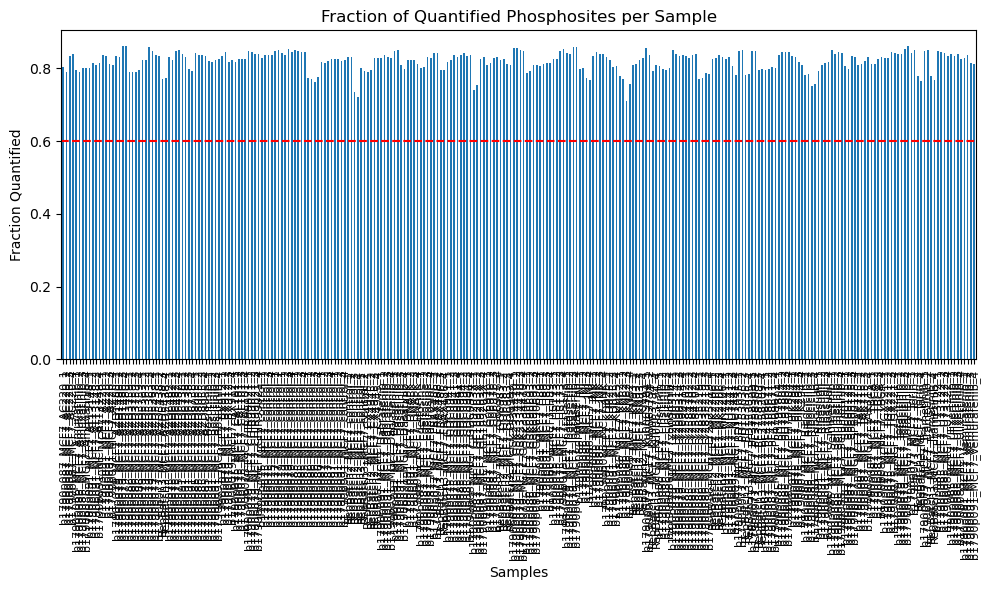

INFO:root:Removed 0 low-quality samples. Retained 276 samples.


In [9]:
# Filter out low-quality samples based on their fraction of quantified phosphosites.
# save_path=None: Optional. If provided, the function will save a plot visualizing the fraction of quantified phosphosites per sample.
aup_fdts, metadata_s = dw.filter_lq_samples(aup_fdt, metadata, p_quant=0.6, save_path=None)

# 6. Quality Control: Excluding Low-Quality Phosphosites

During phosphoproteomics analysis, it's not uncommon to encounter phosphosites quantified in a limited number of samples, resulting in a dataset with a significant number of NA values. These instances can arise due to the low abundance of certain phosphosites or challenges in their detection via LC-MS/MS.

In the following step we determine whether to retain or exclude a phosphosite from further analysis by examining:

- The number of measurements available per condition (**n_rep**): A phosphosite quantified in one or two conditions (**n_cond**) may still offer valuable insights for those specific conditions, despite being NA in others. In such cases, at least two measurements are essential to enable fold change and confidence score calculations.

- The fraction of NA values for each phosphosite across all samples (**p_nas**): Some phosphosites, while challenging to detect (thus, rarely achieving more than one measurement per condition), might be present in a significant fraction of the dataset (e.g., 50% of samples). These are also retained and addressed through a workaround for missing fold change estimation, which will be detailed in '04-mh-estimate-missing-fcs.ipynb'.

In [10]:
# Filtering out low-quality phosphosites from phosphoproteomics data
# The criteria for filtering are based on the availability of measurements across samples and conditions.
aup_fdtsp, removed_phosphosites = dw.filter_lq_phosphosites(
    aup_fdts,
    metadata_s,
    condition_col='perturbagen',  # The column in metadata indicating the experimental condition
    n_rep=2,  # Minimum number of replicates per condition required
    n_cond=1,  # Minimum number of conditions a phosphosite must be quantified in
    p_nas=0.5  # Maximum allowed proportion of NA values across all samples for a phosphosite
)

# Calculate the number of samples where a specified phosphosite is NA
print("Total number of samples: ", len(aup_fdts.columns))
print(removed_phosphosites.isna().sum(axis=1).sort_values())
# Display the first few rows of the removed phosphosites
removed_phosphosites.head()

INFO:root:Removed 128 low-quality phosphosites. Retained 13564 phosphosites out of 13692 total phosphosites.


Total number of samples:  276
TRIM38(Y280)    258
INPP5D(Y865)    258
PPP1R1A(T38)    262
TBC1D4(S106)    265
ZBTB2(T430)     267
               ... 
HMGA2(S102)     276
HMGA2(S101)     276
SALL3(S39)      276
MAP1B(S1242)    276
ZNF532(S434)    276
Length: 128, dtype: int64


name,b1790p087_MCF7_AC220_1,b1790p087_MCF7_AC220_2,b1790p087_MCF7_AC220_3,b1790p087_MCF7_AC220_4,b1790p086_MCF7_Amuvatinib_1,b1790p086_MCF7_Amuvatinib_2,b1790p086_MCF7_Amuvatinib_3,b1790p086_MCF7_Amuvatinib_4,b1790p091_MCF7_AT13148_1,b1790p091_MCF7_AT13148_2,...,b1790p085_MCF7_U73122_3,b1790p085_MCF7_U73122_4,b1790p085_MCF7_Ulixertinib_1,b1790p085_MCF7_Ulixertinib_2,b1790p085_MCF7_Ulixertinib_3,b1790p085_MCF7_Ulixertinib_4,b1790p091_MCF7_Vemurafenib_1,b1790p091_MCF7_Vemurafenib_2,b1790p091_MCF7_Vemurafenib_3,b1790p091_MCF7_Vemurafenib_4
ABLIM1(S353),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADD2(S592),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP12(S505),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP2(T781),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANKRD33B(S405),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusion

Through this notebook, we've demonstrated a structured approach to preprocessing phosphoproteomics experiment data. By renaming samples, filtering phosphosites, merging duplicates, applying a log2 transformation, and excluding low-quality samples and phosphosites, we've prepared our dataset for further analysis.

### Next Steps
Utilize the standardized dataset for further biological analysis, including:
- Differential phosphosite occupancy analysis (DPOA) to identify significant changes in phosphosite occupancy across conditions,
- Estimating missing fold changes,
- Calculating signal intensity-dependent p-values (sid-scores).